In [13]:
import math
import scipy.stats
import numpy as np
import pandas
from collections import defaultdict
import matplotlib.pylab as plt

In [14]:
df = list(pandas.read_csv("poverty.csv").itertuples(index=False))

In [28]:
class MetropolisRegression:
    cache = {}
    freqs = {
        'mean':defaultdict(int),
        'intercept':defaultdict(int),
        'std':defaultdict(int)
    }
    def __init__(self, df, residual_dist, mean=0, intercept=0, std=1):
        self.mean, self.intercept, self.std = mean, intercept, std
        self.residual_dist = residual_dist
    def probability(self, mean, intercept, std):
        mean, intercept, std = round(mean, 1), round(intercept, 1), round(std, 1)
        if (mean, intercept, std) not in self.cache:
            p = 0
            for row in df:
                x, y = row[0], row[1]
                p += self.residual_dist(intercept+mean*x, std).logpdf(y)
            self.cache[mean, intercept, std] = p
        return self.cache[mean, intercept, std]
    def should_accept(self, new_mean, new_intercept, new_std):
        old_log_prob = self.probability(self.mean, self.intercept, self.std)
        new_log_prob = self.probability(new_mean, new_intercept, new_std)
        log_acceptance_probability = new_log_prob - old_log_prob
        if log_acceptance_probability >= 0:
            return True
        else:
            u = np.random.uniform(0, 1, 1)
            if math.log(u) <= log_acceptance_probability:
                return True
        return False
    def next_sample(self):
        new_mean = self.mean + np.random.normal(0, 0.1, 1)[0]
        new_intercept = self.intercept + np.random.normal(0, 0.1, 1)[0]
        new_std = max(0, self.std + np.random.normal(0, 0.1, 1)[0])
        if self.should_accept(new_mean, new_intercept, new_std):
            self.mean, self.intercept, self.std = new_mean, new_intercept, new_std
        self.freqs['mean'][round(self.mean, 1)] += 1
        self.freqs['intercept'][round(self.intercept,1)] += 1
        self.freqs['std'][round(self.std, 1)] += 1
    def run(self, n):
        for i in range(n):
            self.next_sample()
    def plot_mean(self):
        lists = sorted(self.freqs['mean'].items())
        x, y = zip(*lists)
        plt.plot(x, y)
        plt.show()
    def plot_intercept(self):
        lists = sorted(self.freqs['intercept'].items())
        x, y = zip(*lists)
        plt.plot(x, y)
        plt.show()
    def plot_std(self):
        lists = sorted(self.freqs['std'].items())
        x, y = zip(*lists)
        plt.plot(x, y)
        plt.show()

In [29]:
m = MetropolisRegression(df, scipy.stats.norm)

In [32]:
m.run(10)

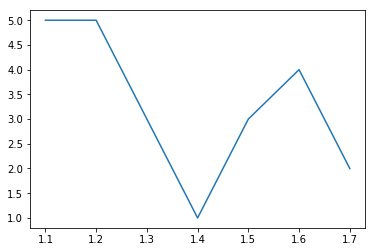

In [33]:
m.plot_std()